In [18]:
#meta 10/2/2020 Naive Gradient Descent
#Bivariate linear regression, 2 parameters - Intercept and Slope

#Make it work with fast.ai, so I understand how all the pieces connect together, and move on to MNIST digit classifier


In [2]:
#hide
#!pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()

In [3]:
#hide
from fastai.vision.all import *
from fastbook import *
#import graphviz
matplotlib.rc('image', cmap='Greys')

# Naive Gradient Descent
Bivariate, Two Parameters - Intercept and Slope

Fit model to data.

## 0. Create Data 
simplest dataset possible

In [4]:
#dataset 1: slope = 2, intercept = 0
X_train = tensor([0, 1, 2]).float()
y_train = tensor([0, 2, 4]).float()

#dataset 2: slope = 1, intercept = 1
X_train = tensor([1, 2, 3]).float()
y_train = tensor([2, 3, 4]).float()

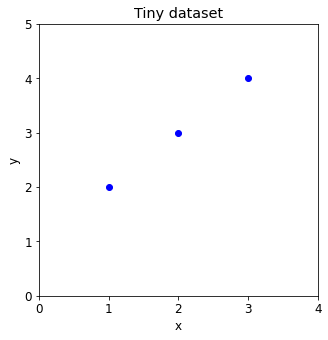

In [5]:
#plot dataset
plt.figure(figsize=(5,5))
plt.title('Tiny dataset')
plt.scatter(X_train, y_train, marker = 'o', c='b')
plt.xlabel('x')
plt.ylabel ('y')
plt.xticks(torch.arange(X_train.max()+2))
plt.yticks(torch.arange(y_train.max()+2))
plt.show()

Dimensions

In [6]:
#tensor rank
print(len(X_train.shape), len(y_train.shape))
#can also get rank with 'ndim'
print(X_train.ndim, y_train.ndim)

1 1
1 1


> PyTorch: Tensor Vocab  
*rank* is the number of axes (or dimensions) in a tensor  
*shape* is the size of each axis of a tensor.
    - In this case, we can see that we have 6,131 images, each of size 28×28 pixels  
*length* of a tensor's shape is its rank. 

Using the term *dimension* may lead to confustion. When confused, it's helpful to translate all statements into terms of rank, axis, and length, which are unambiguous terms.

## 1. Preprocess Data
none, tiny datasets are manually created per requirements

## 2. Train Model with Gradient Descent
`X_train` is input, represented as a vector  
`params` are the weight(s) and bias, also a vector  
We need some way to update the params to make them a little bit better. We can repeat that step a number of times, making the params better and better, until they are as good as we can make them.

Find the best vector `params` which results in the best function to fit model to data. 


To be more specific, here are the steps that we are going to require, to turn this function into a machine learning classifier:

1. *Initialize* the params.
1. For each data point, use these params to *predict* data point value.
1. Based on these predictions, calculate how good the model is (its *loss*).
1. Calculate the *gradient*, which measures for each param, how changing that params would change the loss
1. *Step* (that is, change) all the params based on that calculation.
1. Go back to the step 2, and *repeat* the process.
1. Iterate until you decide to *stop* the training process (for instance, because the model is good enough or you don't want to wait any longer).

These seven steps, illustrated in [gradient_descent](###-summarizing-gradient-descent), are the key to the training of all deep learning models. It's amazing that this process can solve such complex problems!

>PyTorch: special method `requires_grad_`? The magical incantation we use to tell PyTorch that we want to calculate gradients with respect to that variable at that value. It is essentially tagging the variable, so PyTorch will remember to keep track of how to compute gradients of the other, direct calculations on it that you will ask for.  

In deep learning, "gradients" usually means the _value_ of a function's derivative at a particular argument value. 

>PyTorch: The "backward" here refers to *backpropagation*, which is the name given to the process of calculating the derivative of each layer. 

Later, when we calculate the gradients of a deep neural net from scratch. This is called the "backward pass" of the network, as opposed to the "forward pass," which is where the activations are calculated. Life would probably be easier if `backward` was just called `calculate_grad`, but deep learning folks really do like to add jargon everywhere they can!

### 2.1 An End-to-End GD Example with a Tiny Dataset
A dataset with 3 points is enough to understand Gradient Descent and see that it finds params pretty well.

In [7]:
#Global vars and functions
#pick manually, trial and error
#for dataset 1
lr = .4
#for dataset 2
lr = .173

In [8]:
#must tell PyTorch that we want gradients
#def init_params(size, var=1.0): return (torch.randn(size)*var).requires_grad_()

# hypothesis X*theta.T
#not matrix multiplication yet, spell out linear fn
def linear(input_X, params): 
    a,b = params
    return input_X*a + b

# cost function J with embedded loss function
def mse(preds, targets): return ((preds-targets)**2).mean()


#### Manually step thru

#### Step 1: Initialize the parameters

In [9]:
## Step 1: Initialize the parameters, hard coded here
params = tensor([0., 0.], requires_grad=True)


#### Step 2: Calculate the predictions
`y_hat = w*X+b` 

In [10]:
## Step 2: Calculate the predictions
y_hat = linear(X_train, params)
y_hat.shape

torch.Size([3])

#### Step 3: Calculate the loss

In [11]:
## Step 3: Calculate the loss
loss = mse(y_hat, y_train)
loss

tensor(9.6667, grad_fn=<MeanBackward0>)

#### Step 4: Calculate the gradients

In [12]:
## Step 4: Calculate the gradients
loss.backward()
params.grad.shape,params

(torch.Size([2]), tensor([0., 0.], requires_grad=True))

#### Step 5: Step the params. 

In [13]:
## Step 5: adjust step
params.data -= lr * params.grad.data
params.grad = None


#### Step 6: Repeat the process 

In [14]:
#modified to stop when good enough
def apply_step(params, prn=True):
    ## Step 2: Calculate the prediction
    predictions_yhat = linear(X_train, params)
    ## Step 3: Calculate the loss
    loss = mse(predictions_yhat, y_train)
    
    if loss > 1e-6:
        
        ## Step 4: Calculate the gradients
        loss.backward()
        ## Step 5: adjust step    
        params.data -= lr * params.grad.data
        params.grad = None
    else:
        #print("good enough")
        return
    
    if prn: 
        print("loss: ", loss.item())
        
    return predictions_yhat

In [15]:
n_loop = 100
for i in range(n_loop): 
    p = apply_step(params) 
    if not p == None: print(p)

loss:  8.167820930480957
tensor([3.3447, 5.6513, 7.9580], grad_fn=<AddBackward0>)
loss:  6.901548862457275
tensor([0.2912, 0.4617, 0.6323], grad_fn=<AddBackward0>)
loss:  5.831747531890869
tensor([3.1172, 5.2356, 7.3540], grad_fn=<AddBackward0>)
loss:  4.927918910980225
tensor([0.5387, 0.8521, 1.1654], grad_fn=<AddBackward0>)
loss:  4.164299488067627
tensor([2.9267, 4.8848, 6.8429], grad_fn=<AddBackward0>)
loss:  3.5191328525543213
tensor([0.7493, 1.1821, 1.6150], grad_fn=<AddBackward0>)
loss:  2.974032163619995
tensor([2.7671, 4.5887, 6.4103], grad_fn=<AddBackward0>)
loss:  2.5134692192077637
tensor([0.9285, 1.4612, 1.9939], grad_fn=<AddBackward0>)
loss:  2.124324083328247
tensor([2.6335, 4.3389, 6.0443], grad_fn=<AddBackward0>)
loss:  1.7955141067504883
tensor([1.0810, 1.6972, 2.3134], grad_fn=<AddBackward0>)
loss:  1.517678141593933
tensor([2.5219, 4.1281, 5.7344], grad_fn=<AddBackward0>)
loss:  1.282907485961914
tensor([1.2111, 1.8968, 2.5825], grad_fn=<AddBackward0>)
loss:  1.0845

In [16]:
print(params, sep='\n')

tensor([1.0031, 0.9937], requires_grad=True)


#### Step 7: stop
THe model learns the best parameters and returns them in the `params` vector. 

### Summarizing Gradient Descent

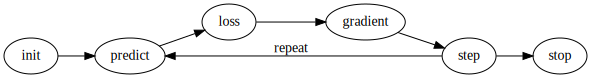

In [17]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

### 2.2 Putting It All Together